In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!cp -r "/content/gdrive/My Drive/Colab Notebooks/music-compression/" ./

In [0]:
%cd music-compression

/content/music-compression/music-compression


In [0]:
!pip install pydub

In [0]:
import torch
import numpy as np

from runner.train import Trainer

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
#!rm 'data/sample/fma_xs/train/099134.mp3'

In [0]:
#from utils.data_helper import stat_all_files
#stat_all_files('data/sample/fma_xs/')

In [0]:
cuda_flag = True

In [0]:
trainer = Trainer('data/sample/fma_xs/',
                  '/content/gdrive/My Drive/Colab Notebooks/music-compression/model_checkpoints/cnn_autoencoder_type7', 
                  batch_size=200, 
                  load_from_disk=True, 
                  cuda=cuda_flag)

In [0]:
trainer.train(num_epochs=1000)

Epoch:1, Loss:0.1599
Epoch:11, Loss:0.1351
Epoch:21, Loss:0.1158
Epoch:31, Loss:0.1276
Epoch:41, Loss:0.0893
Epoch:51, Loss:0.1495
Epoch:61, Loss:0.1185
Epoch:71, Loss:0.1494
Epoch:81, Loss:0.2462
Epoch:91, Loss:0.1395
Epoch:101, Loss:0.1208
Epoch:111, Loss:0.1474
Epoch:121, Loss:0.3885
Epoch:131, Loss:0.1196
Epoch:141, Loss:0.1041
Epoch:151, Loss:0.1105
Epoch:161, Loss:0.1078
Epoch:171, Loss:0.1428
Epoch:181, Loss:0.1612
Epoch:191, Loss:0.1324
Epoch:201, Loss:0.1754
Epoch:211, Loss:0.2943
Epoch:221, Loss:0.2345
Epoch:231, Loss:0.1559
Epoch:241, Loss:0.1013
Epoch:251, Loss:0.1436
Epoch:261, Loss:0.1055
Epoch:271, Loss:0.2044
Epoch:281, Loss:0.2095
Epoch:291, Loss:0.0917
Epoch:301, Loss:0.1718
Epoch:311, Loss:0.1935
Epoch:321, Loss:0.1232
Epoch:331, Loss:0.1271
Epoch:341, Loss:0.1133
Epoch:351, Loss:0.1042
Epoch:361, Loss:0.1175
Epoch:371, Loss:0.2297
Epoch:381, Loss:0.1137
Epoch:391, Loss:0.1028
Epoch:401, Loss:0.1327
Epoch:411, Loss:0.0870
Epoch:421, Loss:0.2677
Epoch:431, Loss:0.1488

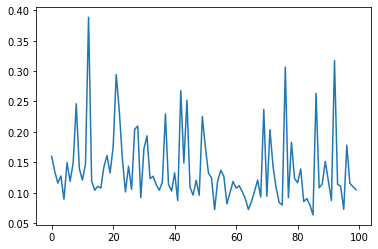

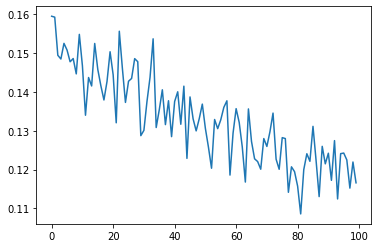

In [0]:
trainer.plot_loss_history(mode='train')
trainer.plot_loss_history(mode='test')

In [0]:
from runner.compression_test import compress_and_regen

In [0]:
model = trainer.model
model.eval()
compress_and_regen('data/sample/fma_xs', 
                   'test/044778.mp3', 
                   model, 
                   '/content/gdrive/My Drive/Colab Notebooks/music-compression/data/sample/fma_xs/model_audio', 
                   is_cuda=cuda_flag)
model.train()

CNNAutoEncoder(
  (encoder_model): Sequential(
    (conv1): Conv1d(1, 64, kernel_size=(512,), stride=(256,))
    (relu1): ReLU(inplace=True)
    (conv2): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
    (relu2): ReLU(inplace=True)
  )
  (decoder_model): Sequential(
    (convT2): ConvTranspose1d(32, 64, kernel_size=(1,), stride=(1,))
    (reluT2): ReLU(inplace=True)
    (convT1): ConvTranspose1d(64, 1, kernel_size=(512,), stride=(256,))
  )
  (loss_criterion_mse): MSELoss()
  (loss_criterion_l1): L1Loss()
)